In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
dir_fig = 'fragile_x/'

In [4]:

file_in = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/FMR1_NEAR_GENES/methyl_data.tsv'
df = pd.read_table(file_in, sep='\t', header=0, keep_default_na=False)
display(df)

file_sam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/methyl_data_sample_order.txt'
with open(file_sam, 'r') as fh:
    sample_order = fh.readline().split(',')[:-1] # last one is an empty string
print(f'number of samples: {len(sample_order)}')
print(f'sample order: {sample_order}')

,chrom,pos,end,region_id,methyl_h1,methyl_h2,methyl_h0,bp_dev_h1,bp_dev_h2,bp_dev_h0,rn_h1,rn_h2,rn_h0
0,chrX,149505139,149505306,IDS_5UTR,.;0|1|0|1|0|1|1|8|19|29|16|8|13|14|9|9|23|36|3...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0;...,.;.;0|1|0|1|2|8|45|62|38|76|67|41|41|26|16|7|1...,".;0,-1,0,0,0;.;0,-1,-1,0,0,0,0;.;-8,0,-10,-7,0...","0;0,0,0,0;.;0,0,-1,0,0;-4,-13,4;3,-7,1,-1,-3,-...",".;.;0;.;-13;.;-14,-4,-5,-1,.,-5;-6,-3,-1,-3,-1...",".;m64278e_211010_185620/128057824/ccs,m64278e_...",m54340U_220419_233431/96864582/ccs;m64278e_211...,.;.;m64278e_220504_233854/47449593/ccs;.;f61da...
1,chrX,149631582,149631792,TMEM185A_5UTR,89|35|46|18|18|19|3|7|55|57|93|96|99|100|100|1...,87|98|92|89|94|67|25|96|99|100|100|99|98|100|9...,.;0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|...,"-21;11,9,9,9,9;.;-21,-21,-21,-22,-21,-21,-21,-...","-21;-21,-21,-21;.;9;-1;.;-1;.;.;-22,-24,-34,-1...",".;9;.;9,8;-7,-20,2;-25,-2,-2,-24;21,1;-22;-20,...",m54340U_220419_233431/9765038/ccs;m64278e_2110...,m54340U_220419_233431/120915953/ccs;m64278e_21...,.;m64278e_211010_185620/118032463/ccs;m64278e_...
2,chrX,150363318,150363530,MAMLD1_5UTR,5|50|69|66|89|93|99|75|6|2|0|1|3|11|5|7|4|97|1...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|4|7|1|1|0|...,.;.;88|92|48|16|1|18|10|14|5|6|31|42|35|14|14|...,"0;0,0,0,0,0,.;.;0,0;-5,-5,2;-20,-2,7;30;.;.;-4...","0,0;0,0,0,0,0;.;1,0,0;31,29,28,23,23,28;31,33,...",".;.;1,0;.,0,0,0;.;.;30,29;2,-4,-6,1,-10,.;-12,...",m54340U_220419_233431/127272343/ccs;m64278e_21...,"m54340U_220419_233431/68093026/ccs,m54340U_220...",".;.;m64278e_220504_233854/72747010/ccs,m64278e..."
3,chrX,150568622,150568662,MTM1_5UTR,"0|0|0|0|0|0,2|21|2|4|3|14;0|3|5|5|4|3,0|0|0|0|...","100|99|95|99|98|65;84|49|50|32|16|2,0|0|0|1|0|...",.;.;0|0|0|0|0|0;.;0|0|0|0|9|2;.;.;0|5|1|42|0|0...,"0,0;0,0,0,0;.;0,0,0;-2,0,-3,-9,0,0,-1;0,0,-2;0...","0;0,0,0,0,0;.;0,0,0,0,0,0,0;0,0,0,1,0,1,0;.;0,...",".;.;0;.;1;.;.;-4;0,-1,-2,-4,.;0,0,0,-1,0;0,2,0...","m54340U_220419_233431/111412064/ccs,m54340U_22...",m54340U_220419_233431/160237789/ccs;m64278e_21...,.;.;m64278e_220504_233854/108396733/ccs;.;37b4...
4,chrX,150693397,150693530,MTMR1_5UTR,.;.;.;100|100|100|100|100|100|99|88|77|85|56|7...,.;100|100|100|100|100|100|100|100|100|100|100|...,.;62|94|66|91|96|65|99|100|100|100|99|98|99|95...,".;.;.;0,0;1,2,-2;.;.;.;.;.;.;.;",".;0,0,0,0;.;0,0,0,0,0;0,1,4,-3,-2,50;.;5,-6,2;...",".;0;0;.;.;1,-6,-3,.,-11,0,3,-3,-1,0,.;-4;0,-3,...",".;.;.;m64278e_211012_051244/158599598/ccs,m642...",".;m64278e_211010_185620/55181984/ccs,m64278e_2...",.;m64278e_211010_185620/36768175/ccs;m64278e_2...
5,chrX,150898590,150898668,CD99L2_5UTR,".;97|34|16|25|10|29|52|50,0|0|0|0|0|0|0|0;.;.;...",64|23|2|2|2|23|12|4;1|0|0|1|0|0|0|0;.;.;100|57...,"39|24|21|12|27|25|37|18,89|98|100|100|97|82|86...",".;0,0;.;.;.;1;-1,0;.;-3;0,-1,-2;.;-8;","0;0;.;.;3;.;-1;.;0;1,-1,-2,0,0,0,.;.;.;","2,0,0;0,0,0,0,0,2,0,0,0,0;0,-1,0;0,0,0,0,0,0,0...",".;m64278e_211010_185620/5898795/ccs,m64278e_21...",m54340U_220419_233431/143263118/ccs;m64278e_21...,"m54340U_220419_233431/154862544/ccs,m54340U_22..."
6,chrX,150983336,150983376,HMGB3_5UTR,".;97|99|99|98|99,100|100|99|98|96;.;42|99|98|9...",".;100|100|100|99|100,1|3|0|2|2,96|99|99|99|99,...",".;0|0|0|0|0,1|28|9|36|35;0|0|0|0|0;.;0|0|20|32...",".;0,0;.;0,0,0;3,0;1,0;0;.;.;-1,-2,-2,0;.;.;",".;0,0,0,0,0;.;0,0,0;0,1,-2,0;-4,-3,0;2,2,-1,0,...",".;0,0;0;.;0,0,-11,-1;-6;.;-2,-2,0,1;0,0,-3;.;4...",".;m64278e_211010_185620/41944331/ccs,m64278e_2...",".;m64278e_211010_185620/60950625/ccs,m64278e_2...",".;m64278e_211010_185620/117572563/ccs,m64278e_..."


number of samples: 12
sample order: ['REACH000450', 'REACH000451', 'REACH000452', 'REACH000453', 'REACH000518', 'REACH000519', 'REACH000523', 'REACH000524', 'REACH000560', 'REACH000561', 'REACH000562', 'REACH000563']


In [6]:
df_exnd = df[['chrom' ,'pos', 'end', 'region_id']].copy()
cols = df.columns.tolist()[4:]
#print(cols)

for idx, sample in enumerate(sample_order):
    if sample == 'REACH000450' or sample == 'REACH000452':
        continue
    for col in cols:
        df_exnd[f'{sample}_{col}'] = df[col].str.split(';').apply(lambda row: row[idx])
display(df_exnd)

,chrom,pos,end,region_id,REACH000451_methyl_h1,REACH000451_methyl_h2,REACH000451_methyl_h0,REACH000451_bp_dev_h1,REACH000451_bp_dev_h2,REACH000451_bp_dev_h0,...,REACH000562_rn_h0,REACH000563_methyl_h1,REACH000563_methyl_h2,REACH000563_methyl_h0,REACH000563_bp_dev_h1,REACH000563_bp_dev_h2,REACH000563_bp_dev_h0,REACH000563_rn_h1,REACH000563_rn_h2,REACH000563_rn_h0
0,chrX,149505139,149505306,IDS_5UTR,0|1|0|1|0|1|1|8|19|29|16|8|13|14|9|9|23|36|35|...,100|100|100|100|100|100|100|100|100|99|99|100|...,.,"0,-1,0,0,0","0,0,0,0",.,...,"0b3413d0-ea84-41fe-8b99-eae030c652ae,be5abf8d-...",.,.,22|100|100|100|100|82|96|29|100|17|99|0|1|98|1...,.,.,"2,-5,-3,-2,7,-3,-3",.,.,"93a7ae17-f919-4328-b765-ab44f429c831,fd220c57-..."
1,chrX,149631582,149631792,TMEM185A_5UTR,70|61|89|77|95|84|87|97|98|98|98|99|99|98|97|9...,0|1|0|0|0|0|0|0|0|0|0|0|0|2|6|22|29|46|25|17|2...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|4|...,"11,9,9,9,9","-21,-21,-21",9,...,"f7852ab4-8b11-4881-8904-45a4e500e342,d83ffa9b-...",.,.,0|100|100|5|100|100|0|2|2|100|100|100|0|100|10...,.,.,"-20,-23,-26,-26",.,.,"c1a40f4d-06a1-4202-875b-d409ba208772,f42cfc3f-..."
2,chrX,150363318,150363530,MAMLD1_5UTR,0|0|1|0|0|3|2|3|4|0|0|0|1|2|0|0|0|0|0|1|1|26|2...,0|0|0|0|0|0|1|8|10|13|4|1|1|0|0|0|0|0|0|0|0|0|...,.,"0,0,0,0,0,.","0,0,0,0,0",.,...,"75ea6d34-1c04-4793-9a7c-82082bce8efa,5ea1d21d-...",.,.,55|0|0|0|4|0|0|0|0|0|0|0|0|22|0|0|0|0|0|48|40|...,.,.,"0,-26,.,-1,4,-10,5",.,.,"2b7287ee-ea1c-4830-82a5-47f451d7400b,2b7287ee-..."
3,chrX,150568622,150568662,MTM1_5UTR,"0|3|5|5|4|3,0|0|0|0|0|0,0|0|0|0|0|0,0|0|0|0|1|4","84|49|50|32|16|2,0|0|0|1|0|1,0|2|1|0|1|1,100|1...",.,"0,0,0,0","0,0,0,0,0",.,...,"5de06f6e-a649-472c-adcc-c41e9c574230,56b3a6e6-...",.,.,"0|11|1|99|0|98,0|98|99|100|97|91,38|97|28|100|...",.,.,"0,0,-1,0,-1",.,.,"80b1a4e6-eb85-4099-8c5e-4815d26bc95f,0e6abb1a-..."
4,chrX,150693397,150693530,MTMR1_5UTR,.,100|100|100|100|100|100|100|100|100|100|100|10...,62|94|66|91|96|65|99|100|100|100|99|98|99|95|7...,.,"0,0,0,0",0,...,"7b7f5c69-6867-4026-bc90-a9c4d97ea9ab,d43e6c1a-...",.,.,"40|0|12|5|75|39|5|1|9|32|0|0|1|2|0|6,100|86|98...",.,.,"4,0,6,.,8,9,-1,-2",.,.,"d597da74-0eb7-457d-8801-5020c9004699,c54d4f71-..."
5,chrX,150898590,150898668,CD99L2_5UTR,"97|34|16|25|10|29|52|50,0|0|0|0|0|0|0|0",1|0|0|1|0|0|0|0,"93|94|56|10|1|0|0|4,0|0|0|1|0|0|0|0,100|100|10...","0,0",0,"0,0,0,0,0,2,0,0,0,0",...,"cd701f8c-3f43-4d58-951e-0fe049e9bdb6,66c53140-...",100|92|93|20|97|78|100,.,"100|96|0|1|3|99|61|7,0|0|2|4|1|6|2|0,53|54|68|...",-8,.,"1,-1,0",f0200cba-2866-4e17-8318-bbaea16543eb,.,"e1ebcd7d-db71-4134-a551-0a049d213fad,37f055e5-..."
6,chrX,150983336,150983376,HMGB3_5UTR,"97|99|99|98|99,100|100|99|98|96","100|100|100|99|100,1|3|0|2|2,96|99|99|99|99,0|...","0|0|0|0|0,1|28|9|36|35","0,0","0,0,0,0,0","0,0",...,"0931c67f-eb80-427c-8d3b-fa388aac8099,ac30593c-...",.,.,"43|1|86,98|100|100|100|84|64,1|7|28|1|0,0|0|0|...",.,.,"3,0,0,0,0,0,1,-3,-2,-2,2",.,.,"d32fa101-5e35-46dd-9896-6a7ec7dcc91a,342205f2-..."


In [7]:
bp_dev_thr = 60

In [8]:
### make a dataframe for each sample to represent each bp methylation in each region
#pd.set_option('display.max_rows', 10)
def get_bp_df(df_in, sample):
    df_bps = pd.DataFrame()
    read_hps = ['h1', 'h2', 'h0']
    #read_haplotype_dict = {} # given a read names returns if the read is PM or N
    #for read_hp in read_hps:
    #    for read_name, bp_dev in zip(df_in.loc[df_in.region_id=='FMR1_CGG_PLUS_B', f'{sample}_rn_{read_hp}'].values[0].split(','), 
    #                                 df_in.loc[df_in.region_id=='FMR1_CGG_PLUS_B', f'{sample}_bp_dev_{read_hp}'].values[0].split(',')):
    #        haplotype = 'Normal'
    #        if bp_dev == '.':
    #            haplotype = 'NA'
    #        elif int(bp_dev) >= bp_dev_thr:
    #            haplotype = 'Expanded'
    #        read_haplotype_dict[read_name] = haplotype
    #print(read_haplotype_dict)
    for idx in range(df_in.shape[0]):
    #for idx in range(1):
        region_id = df_in.loc[idx, 'region_id']
        for read_hp in read_hps:
            m_region = df_in.loc[idx, f'{sample}_methyl_{read_hp}']
            #print(f'm_region: {m_region}')
    
            bp_dev_list = df_in.loc[idx, f'{sample}_bp_dev_{read_hp}'].split(',')
            read_name_list = df_in.loc[idx, f'{sample}_rn_{read_hp}'].split(',')
            
            if m_region == '.':
                continue
                
            m_reads = m_region.split(',')
            #print(f'm_reads: {m_reads}')
    
            m_bps = []
            read_names = []
            bp_devs = []
            hp_tags = []
            tmp = [x.split('|') for x in m_reads]
            for i_x, x in enumerate(tmp):
                m_bps.extend(x)
                #read_ids.extend([f'{region_id}_{read_hp}_{i_x}' for i in range(len(x))])
                read_names.extend([read_name_list[i_x] for i in range(len(x))])
                bp_devs.extend([bp_dev_list[i_x] for i in range(len(x))])
                hp_tags.extend([read_hp for i in range(len(x))])
            #print(f'm_bps: {m_bps}')
            #print(f'read_ids: {read_ids}')
    
            df_tmp = pd.DataFrame()
            df_tmp['region_id'] = [region_id for x in m_bps]
            df_tmp['methylation'] = m_bps
            df_tmp['read_name'] = read_names
            df_tmp['bp_dev'] = bp_devs
            df_tmp['hp_tag'] = hp_tags
    
            df_bps = pd.concat([df_bps, df_tmp], ignore_index=True)

    df_bps['methylation'] = df_bps['methylation'].astype(int)
    df_bps = df_bps.loc[df_bps.bp_dev!='.']
    df_bps['bp_dev'] = df_bps['bp_dev'].astype(int)
    #df_bps['haplotype'] = df_bps.read_name.apply(lambda x: read_haplotype_dict[x] if x in read_haplotype_dict else 'NA')
   #df_bps = df_bps.loc[df_bps.haplotype!='NA']
    #display(df_bps)
    return df_bps

In [9]:
sample = 'REACH000561'
df_bps = get_bp_df(df_exnd, sample)
pd.set_option('display.max_rows', 10)
display(df_bps)

,region_id,methylation,read_name,bp_dev,hp_tag
0,IDS_5UTR,96,fb123d85-b6e9-401f-9efd-e393475df1af,-2,h0
1,IDS_5UTR,0,fb123d85-b6e9-401f-9efd-e393475df1af,-2,h0
2,IDS_5UTR,0,fb123d85-b6e9-401f-9efd-e393475df1af,-2,h0
3,IDS_5UTR,2,fb123d85-b6e9-401f-9efd-e393475df1af,-2,h0
4,IDS_5UTR,13,fb123d85-b6e9-401f-9efd-e393475df1af,-2,h0
...,...,...,...,...,...
1085,HMGB3_5UTR,0,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2
1086,HMGB3_5UTR,0,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2
1087,HMGB3_5UTR,54,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2
1088,HMGB3_5UTR,4,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2


/scratch/smmortazavi/job_35974266/ipykernel_1556260/3707290750.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000451.png


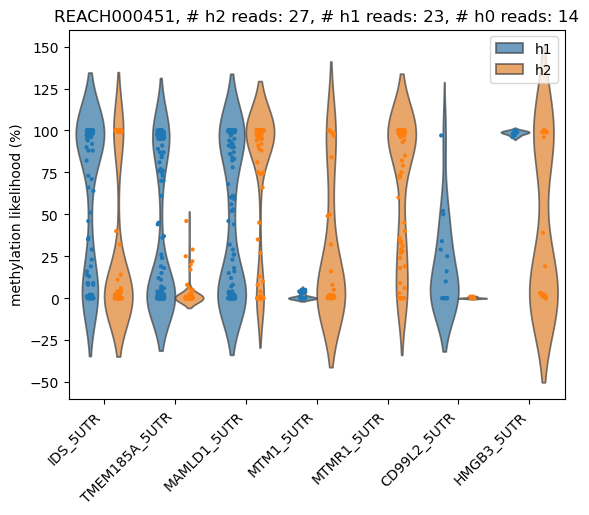

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3707290750.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000451.png


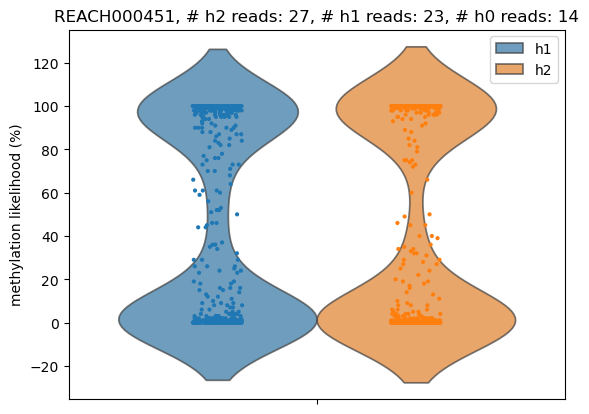

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3707290750.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000453.png


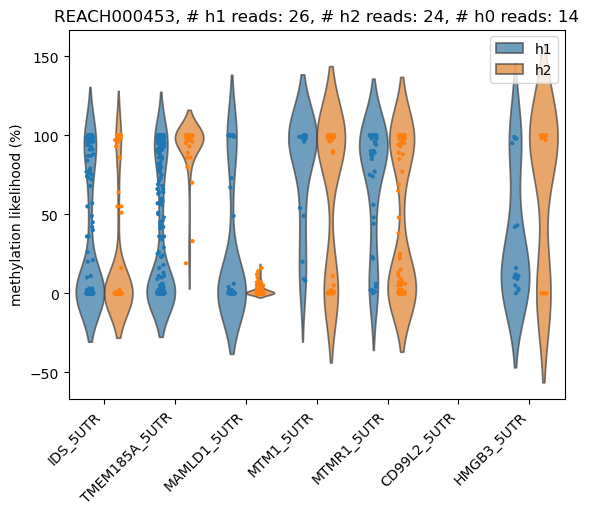

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3707290750.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000453.png


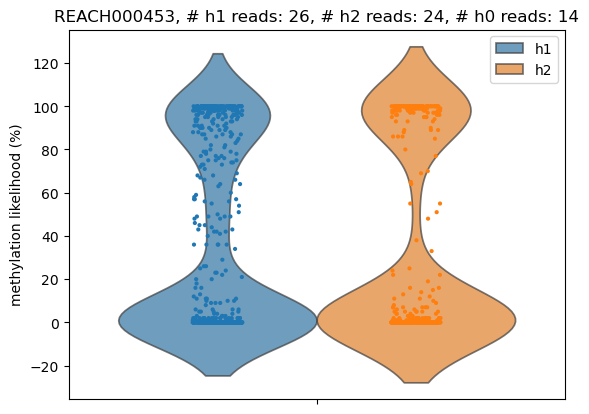

In [21]:
### family of REACH000450
samples = ['REACH000451', 'REACH000453']

for sample in samples:
    df_bps = get_bp_df(df_exnd, sample)
    target_regions = df_exnd.region_id.tolist()
    #target_regions = ['IDS_5UTR']
    df_flt = df_bps.loc[df_bps.region_id.isin(target_regions)]
    #pd.set_option('display.max_rows', 10)
    #display(df_flt)
    #counts = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'hp_tag']].value_counts()
    counts = df_bps[['read_name', 'hp_tag']].value_counts()
    counts_hap = counts.index.get_level_values(1).value_counts()
    title = sample
    for hp in counts_hap.index:
        title = f'{title}, # {hp} reads: {counts_hap[hp]}'
    hue_order = []
    for hp in ['h1', 'h2']:
        if hp in counts_hap.index:
            hue_order.append(hp)
    if len(hue_order) == 0:
        hue_order = ['h0']
    plt.figure()
    sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')
    ax = sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/NearGenes_methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

    # merge all genes together
    plt.figure()
    sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')
    ax = sb.stripplot(data=df_flt, x=None, y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/NearGenesMerged_methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3570210256.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000561.png


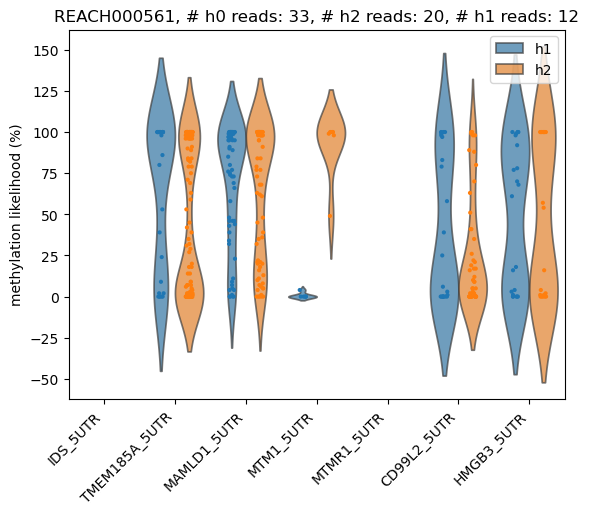

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3570210256.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000561.png


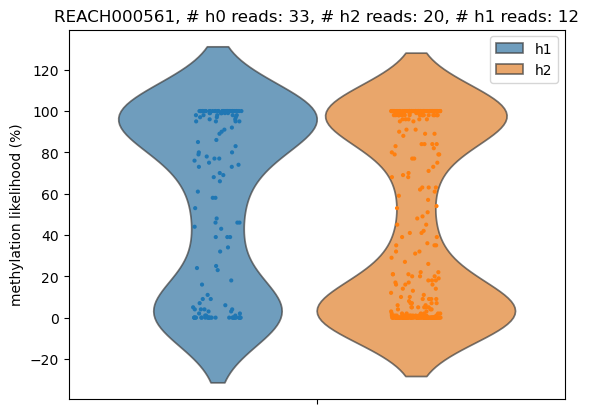

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3570210256.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000563.png


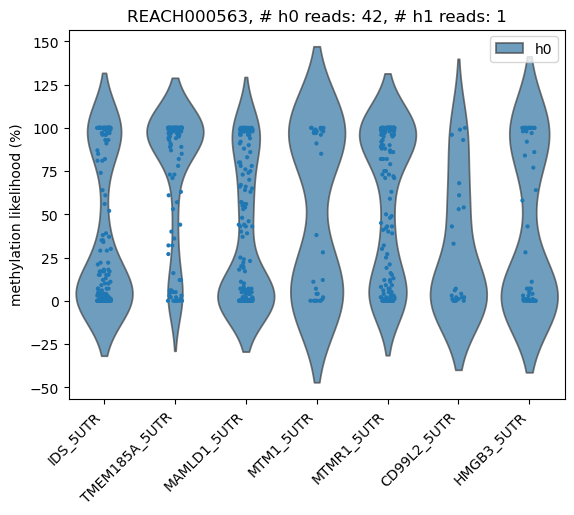

/scratch/smmortazavi/job_35974266/ipykernel_1556260/3570210256.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000563.png


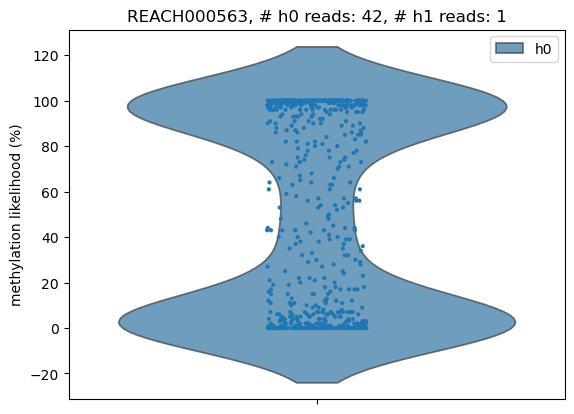

In [23]:
### family of REACH000560
samples = ['REACH000561', 'REACH000563']

for sample in samples:
    df_bps = get_bp_df(df_exnd, sample)
    target_regions = df_exnd.region_id.tolist()
    #target_regions = ['IDS_5UTR']
    df_flt = df_bps.loc[df_bps.region_id.isin(target_regions)]
    #pd.set_option('display.max_rows', 10)
    #display(df_flt)
    #counts = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'hp_tag']].value_counts()
    counts = df_bps[['read_name', 'hp_tag']].value_counts()
    counts_hap = counts.index.get_level_values(1).value_counts()
    title = sample
    for hp in counts_hap.index:
        title = f'{title}, # {hp} reads: {counts_hap[hp]}'
    hue_order = []
    for hp in ['h1', 'h2']:
        if hp in counts_hap.index:
            hue_order.append(hp)
    if len(hue_order) == 0 or sample == 'REACH000563':
        hue_order = ['h0']
    plt.figure()
    sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')
    ax = sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/NearGenes_methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

    # merge all genes together
    plt.figure()
    sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')
    ax = sb.stripplot(data=df_flt, x=None, y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/NearGenesMerged_methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

/scratch/smmortazavi/job_35974266/ipykernel_1556260/1855590875.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000518.png


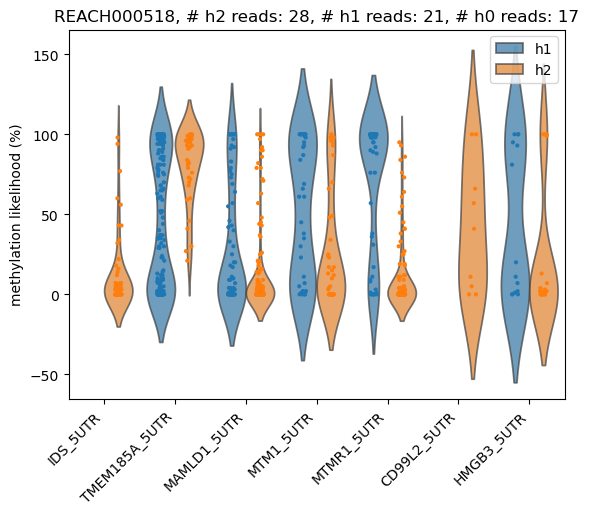

/scratch/smmortazavi/job_35974266/ipykernel_1556260/1855590875.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000518.png


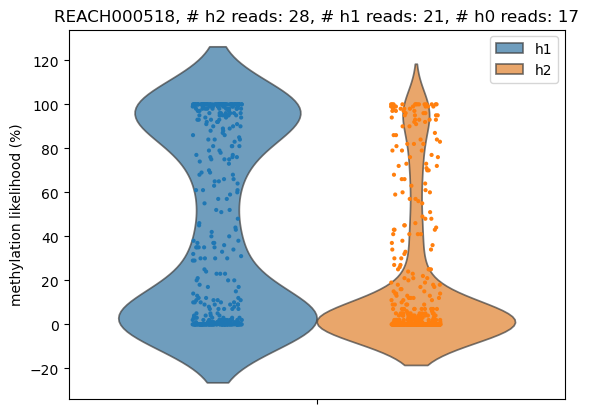

/scratch/smmortazavi/job_35974266/ipykernel_1556260/1855590875.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000519.png


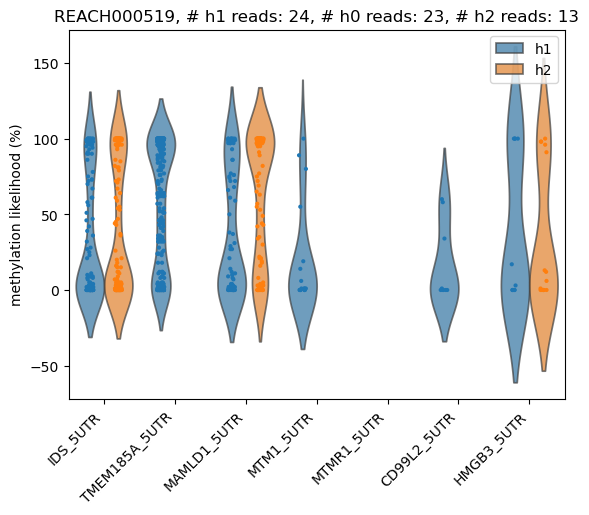

/scratch/smmortazavi/job_35974266/ipykernel_1556260/1855590875.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000519.png


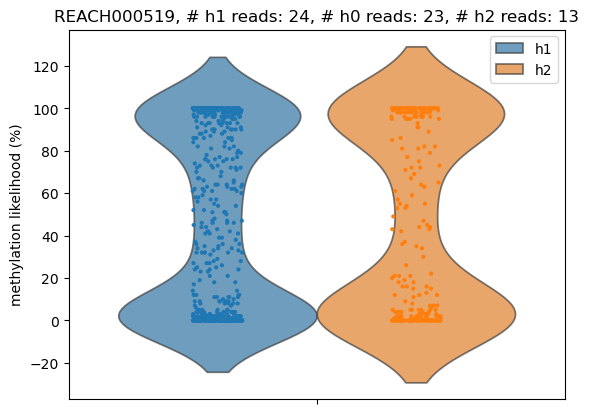

/scratch/smmortazavi/job_35974266/ipykernel_1556260/1855590875.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenes_methylation_probs_REACH000523.png


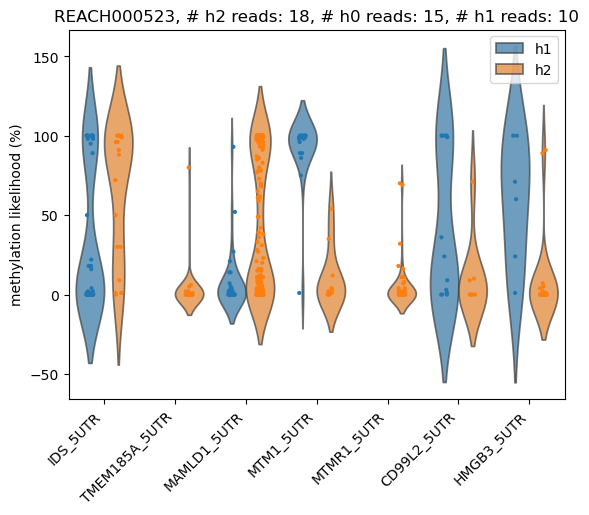

/scratch/smmortazavi/job_35974266/ipykernel_1556260/1855590875.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')


fragile_x//NearGenesMerged_methylation_probs_REACH000523.png


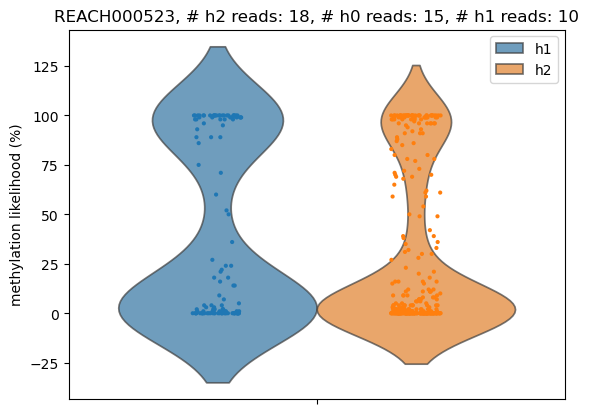

In [24]:
### family of REACH000518, Hp stratification, phasing is good and there is no very large hap
samples = ['REACH000518', 'REACH000519', 'REACH000523']

for sample in samples:
    df_bps = get_bp_df(df_exnd, sample)
    target_regions = df_exnd.region_id.tolist()
    #target_regions = ['IDS_5UTR']
    df_flt = df_bps.loc[df_bps.region_id.isin(target_regions)]
    #pd.set_option('display.max_rows', 10)
    #display(df_flt)
    #counts = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'hp_tag']].value_counts()
    counts = df_bps[['read_name', 'hp_tag']].value_counts()
    counts_hap = counts.index.get_level_values(1).value_counts()
    title = sample
    for hp in counts_hap.index:
        title = f'{title}, # {hp} reads: {counts_hap[hp]}'
    hue_order = []
    for hp in ['h1', 'h2']:
        if hp in counts_hap.index:
            hue_order.append(hp)
    if len(hue_order) == 0:
        hue_order = ['h0']
    plt.figure()
    sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')
    ax = sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/NearGenes_methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

    # merge all genes together
    plt.figure()
    sb.violinplot(data=df_flt, x=None, y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None, scale='width')
    ax = sb.stripplot(data=df_flt, x=None, y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/NearGenesMerged_methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()